A partir do **Método de Otso** é possível adquirir "automáticamente" o valor ideal de limiar que separa o fundo da imagem dos objetos.

Este método utiliza um histograma para visualizar a distribuição de pixels da imagem e a partir disto, é possível realizar a separação do fundo.

O Método de Otsu calcula o melhor limiar com base no histograma.

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def view_original_gray(img, gray):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

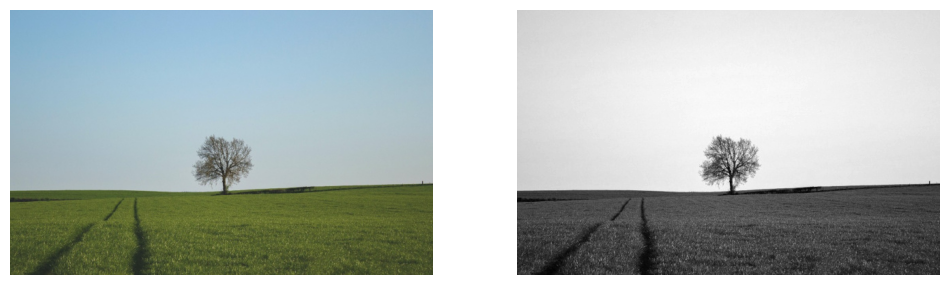

In [42]:
img = cv2.imread('images/paisagem01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

view_original_gray(img, img_gray)

In [43]:
def view(img):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

Limiar:  136.0


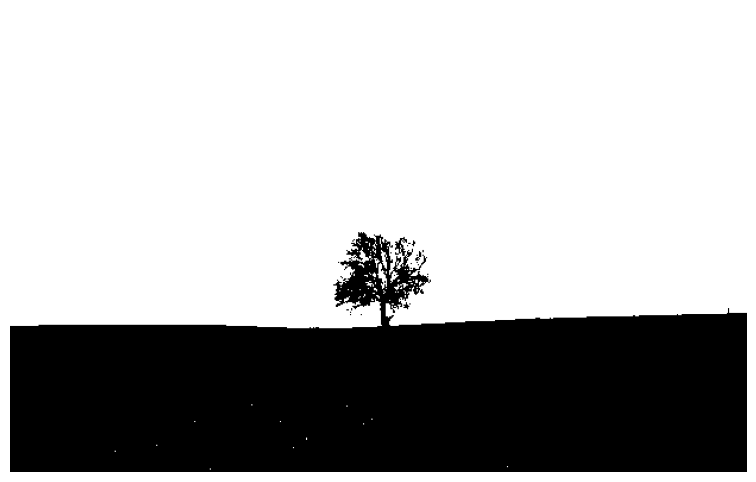

In [44]:
limiar, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Limiar: ', limiar)

view(img_otsu)

### Histogramas

In [45]:
hist, bins = np.histogram(img_gray,
                          256, # 255 bins (barras)
                          [0,256]) # 0 a 255
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          3,    3,   15,   36,   54,   88,  127,  164,  205,  253,  231,
        201,  190,  214,  211,  220,  216,  239,  260,  254,  297,  329,
        399,  454,  475,  568,  645,  701,  775,  839,  957, 1077, 1136,
       1260, 1364, 1424, 1583, 1680, 1778, 1884, 1949, 2054, 2304, 2328,
       2452, 2512, 2630, 2590, 2607, 2563, 2580, 2583, 2418, 2406, 2354,
       2206, 2124, 2018, 1824, 1595, 1559, 1365, 1158, 1007,  865,  683,
        610,  508,  435,  364,  313,  245,  244,  200,  190,  140,  142,
        133,  130,   84,  122,   83,   88,   75,   90,   66,   62,   66,
         58,   62,   76,   52,   61,   69,   57,   52,   54,   53,   58,
         48,   54,   66,   48,   60,   66,   55,   55,   44,   59,   72,
         52,   59,   52,   54,   48,   53,   50,   

**Importante salientar**

O Método de Otsu funciona melhor em imagens **bi modais** que possuem grandes distribuições no histograma bem distinguíveis, uma do lado da outra.

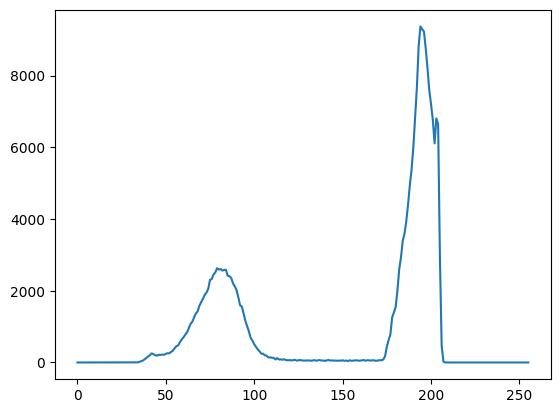

In [46]:
plt.plot(hist)

A função flatten transforma a matriz (2D) em um vetor (1D).

Função semelhante: *ravel()*.

(array([3.000e+00, 3.000e+00, 1.500e+01, 0.000e+00, 3.600e+01, 5.400e+01,
        0.000e+00, 8.800e+01, 1.270e+02, 0.000e+00, 1.640e+02, 2.050e+02,
        2.530e+02, 0.000e+00, 2.310e+02, 2.010e+02, 0.000e+00, 1.900e+02,
        2.140e+02, 0.000e+00, 2.110e+02, 2.200e+02, 0.000e+00, 2.160e+02,
        2.390e+02, 2.600e+02, 0.000e+00, 2.540e+02, 2.970e+02, 0.000e+00,
        3.290e+02, 3.990e+02, 0.000e+00, 4.540e+02, 4.750e+02, 0.000e+00,
        5.680e+02, 6.450e+02, 7.010e+02, 0.000e+00, 7.750e+02, 8.390e+02,
        0.000e+00, 9.570e+02, 1.077e+03, 0.000e+00, 1.136e+03, 1.260e+03,
        1.364e+03, 0.000e+00, 1.424e+03, 1.583e+03, 0.000e+00, 1.680e+03,
        1.778e+03, 0.000e+00, 1.884e+03, 1.949e+03, 0.000e+00, 2.054e+03,
        2.304e+03, 2.328e+03, 0.000e+00, 2.452e+03, 2.512e+03, 0.000e+00,
        2.630e+03, 2.590e+03, 0.000e+00, 2.607e+03, 2.563e+03, 0.000e+00,
        2.580e+03, 2.583e+03, 2.418e+03, 0.000e+00, 2.406e+03, 2.354e+03,
        0.000e+00, 2.206e+03, 2.124e+0

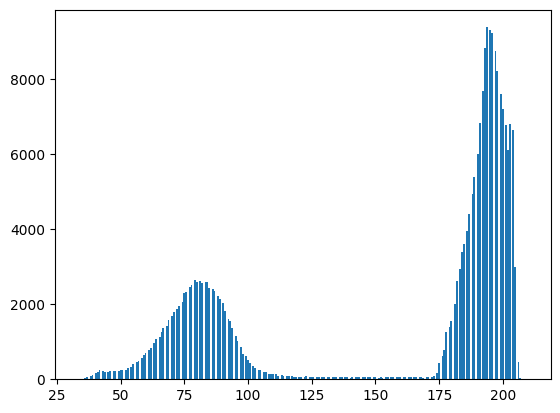

In [47]:
# Feito antes por mim
img_flatten = img_gray.flatten() # Achata a imagem para adquirir todos os valores de pixels da imagem em um vetor
plt.hist(img_flatten, bins=255) # Exibe esse vetor no histograma

### Melhorando a segmentação em imagens com ruído

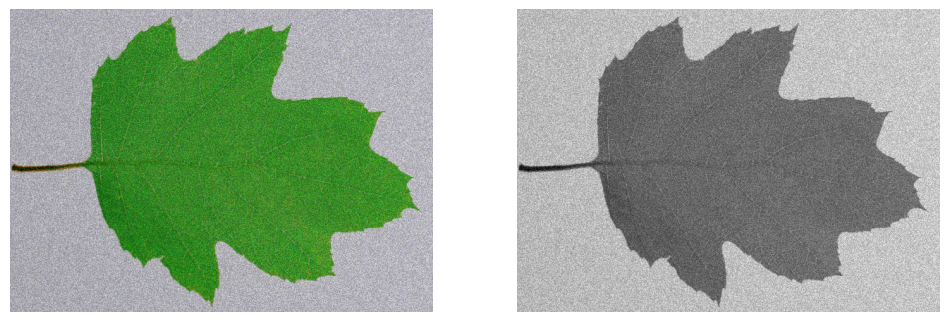

In [48]:
img_noise = cv2.imread('images/folha_ruido.jpg')
img_noise = cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB)
img_noise_gray = cv2.cvtColor(img_noise, cv2.COLOR_BGR2GRAY)

view_original_gray(img_noise, img_noise_gray)

(array([1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 6.000e+00, 2.000e+00, 6.000e+00,
        0.000e+00, 6.000e+00, 7.000e+00, 9.000e+00, 9.000e+00, 1.000e+01,
        6.000e+00, 5.000e+00, 1.500e+01, 4.000e+00, 8.000e+00, 4.000e+00,
        0.000e+00, 1.200e+01, 2.000e+00, 1.000e+01, 9.000e+00, 7.000e+00,
        7.000e+00, 1.100e+01, 1.100e+01, 1.100e+01, 8.000e+00, 1.000e+01,
        0.000e+00, 7.000e+00, 8.000e+00, 1.000e+01, 1.400e+01, 1.000e+01,
        1.100e+01, 9.000e+00, 1.300e+01, 1.600e+01, 1.500e+01, 1.200e+01,
        0.000e+00, 9.000e+00, 1.600e+01, 1.400e+01, 1.800e+01, 2.400e+01,
        2.500e+01, 3.500e+01, 3.600e+01, 3.900e+01, 5.000e+01, 4.200e+01,
        0.000e+00, 6.900e+01, 8.300e+01, 1.010e+02, 1.290e+02, 1.450e+02,
        2.040e+02, 2.750e+02, 3.030e+02, 3.650e+02, 4.690e+02, 5.350e+02,
        0.000e+00, 6.510e+02, 7.400e+02, 8.680e+02, 9.820e+02, 1.170e+03,
        1.254e+03, 1.375e+03, 1.529e+0

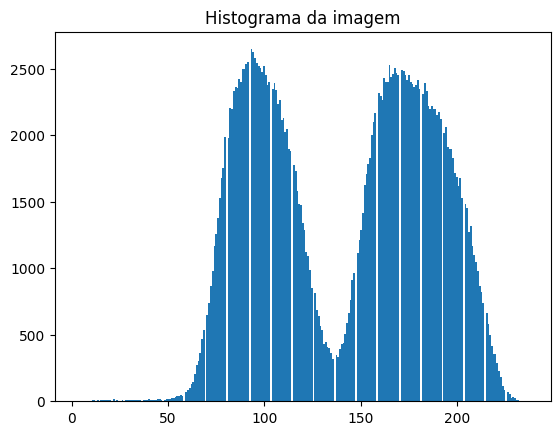

In [49]:
plt.title('Histograma da imagem')
plt.hist(img_noise_gray.ravel(), bins=255) # ravel() tem o mesmo resultado que flatten()

Limiar:  138.0


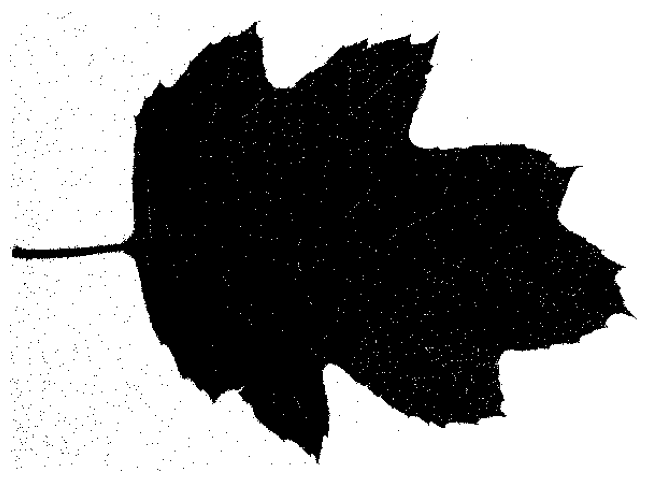

In [50]:
limiar, img_otsu = cv2.threshold(img_noise_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Limiar: ', limiar)

view(img_otsu)

Para diminuir o ruído podemos utilizar um desfoque gaussiano.

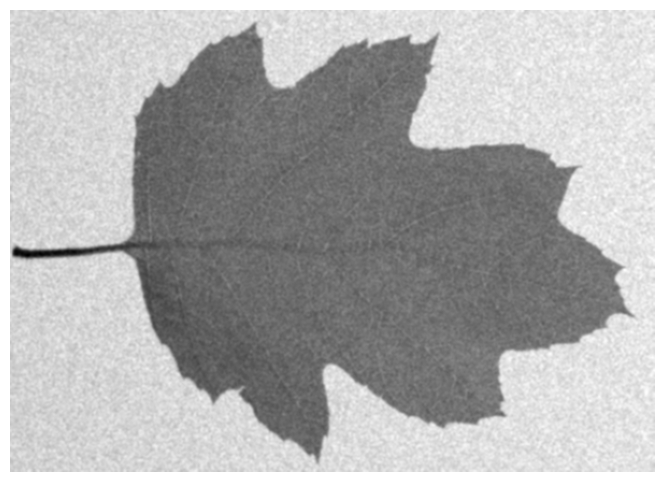

In [53]:
desfoque = cv2.GaussianBlur(img_noise_gray, (5,5), 0)

view(desfoque)

Realizando o método de otsu após a aplicação do desfoque.

Limiar:  138.0


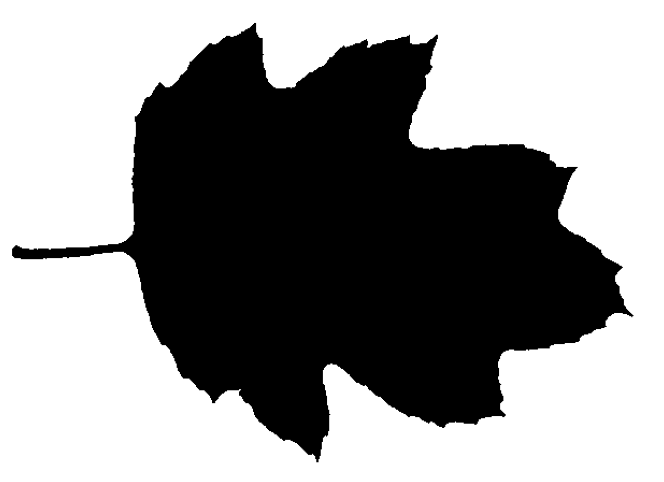

In [54]:
limiar, img_otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Limiar: ', limiar)

view(img_otsu)

Visualizando o histograma (distribuição dos pixels) da imagem com desfoque.

(array([2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 5.000e+00,
        2.000e+00, 0.000e+00, 6.000e+00, 8.000e+00, 0.000e+00, 1.400e+01,
        1.900e+01, 9.000e+00, 0.000e+00, 1.600e+01, 1.400e+01, 0.000e+00,
        1.200e+01, 1.100e+01, 1.300e+01, 0.000e+00, 1.300e+01, 1.400e+01,
        1.500e+01, 0.000e+00, 7.000e+00, 1.100e+01, 0.000e+00, 1.200e+01,
        5.000e+00, 6.000e+00, 0.000e+00, 8.000e+00, 1.200e+01, 0.000e+00,
        8.000e+00, 1.000e+01, 2.000e+00, 0.000e+00, 9.000e+00, 1.000e+01,
        6.000e+00, 0.000e+00, 1.000e+01, 1.000e+01, 0.000e+00, 1.000e+01,
        1.100e+01, 1.500e+01, 0.000e+00, 8.000e+00, 1.600e+01, 0.000e+00,
        8.000e+00, 1.200e+01, 1.700e+01, 0.000e+00, 1.400e+01, 1.600e+01,
        1.100e+01, 0.000e+00, 1.200e+01, 1.700e+01, 0.000e+00, 1.600e+01,
        1.500e+01, 3.200e+01, 0.000e+00, 2.800e+01, 4.000e+01, 0.000e+00,
        4.500e+01, 6.600e+01, 7.800e+01, 0.000e+00, 9.600e+01, 1.220e+02,
        1.480e+02, 0.000e+00, 2.120e+0

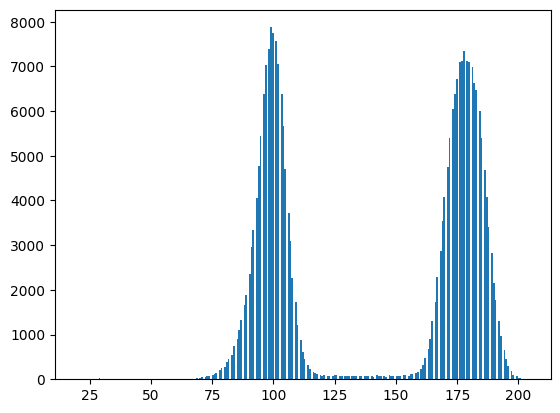

In [ ]:
plt.hist(desfoque.ravel(), bins=255)